# Kalman Filter Implementation

In [1]:

import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt

import datetime
import pandas_datareader as web

In [2]:
# 1. Kalman_Filter Class

def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])  
            return Likelihood

def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1: 
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
        else: 
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    
            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]    
    for  t in range(S-1,0,-1):
     
        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])
    
    u_smooth = u_smooth[0:-1]
    return u_smooth

In [3]:
start = datetime.datetime(2012, 9, 30)
end = datetime.datetime(2022, 9, 30)
df_TSM = web.DataReader('TSM', 'yahoo', start, end) 
TSM = df_TSM
TSM = TSM.reset_index()
TSM['Date'] = pd.to_datetime(TSM['Date'])
TSM['Typical_Price'] = TSM[['High','Low','Close']].mean(axis=1)
TSM['lrets'] = (np.log(TSM.Close) - np.log(TSM.Close.shift(1))) * 100.
TSM.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2012-10-01,15.940000,15.700000,15.730000,15.900000,19411300.0,11.899860,15.846666,NaN
1,2012-10-02,16.059999,15.860000,15.980000,16.000000,17701800.0,11.974703,15.973333,0.626964
2,2012-10-03,16.049999,15.820000,16.040001,16.049999,13156700.0,12.012122,15.973333,0.312008
3,2012-10-04,16.170000,16.000000,16.040001,16.160000,15213900.0,12.094447,16.110000,0.683024
4,2012-10-05,16.309999,16.030001,16.160000,16.070000,10687600.0,12.027092,16.136667,-0.558488


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


C:\Users\pramo\AppData\Local\Temp/ipykernel_33684/1727377143.py:7: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


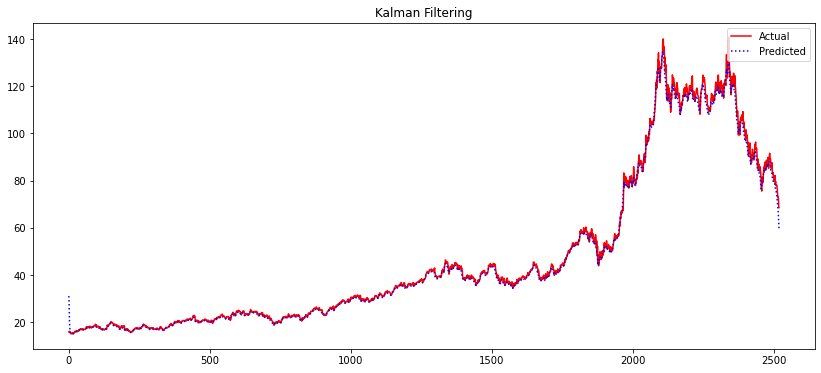

,Actual,Predicted,Open,Close
Date,,,,
2012-10-01,15.900000,31.069778,15.730000,15.900000
2012-10-02,16.000000,28.000774,15.980000,16.000000
2012-10-03,16.049999,21.759663,16.040001,16.049999
2012-10-04,16.160000,18.454053,16.040001,16.160000
2012-10-05,16.070000,16.686021,16.160000,16.070000
2012-10-08,15.530000,15.705517,15.840000,15.530000
2012-10-09,15.360000,15.268138,15.430000,15.360000
2012-10-10,15.120000,15.053533,15.320000,15.120000
2012-10-11,15.030000,15.011170,15.190000,15.030000


In [4]:
Y = TSM['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.9, 0.8, 1.1])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
y_pred = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, y_pred,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(y_pred),
                  'Date':TSM['Date'],
                  'Open':TSM['Open'],
                  'Close':TSM['Close']
                       })


results.set_index('Date',inplace = True)
results.head(10)

# 3.1 Long Short Day trading:
* if predicted > yesterdays close, buy and sell at end of day

* if predicted < yesterdays close, sell and buy at end of day

0 Sell at Open 9988.55 - 635 14
0 Buy Back at Close 10110.5 0


1 Buy at Open 10099.36 632 14
1 Sell at Close 10126.0 0


2 Buy at Open 10121.24 631 14
2 Sell at Close 10141.55 0


3 Buy at Open 10137.28 632 9
3 Sell at Close 10222.12 0


4 Buy at Open 10213.12 632 1
4 Sell at Close 10157.24 0


5 Sell at Open 10153.44 - 641 0
5 Buy Back at Close 9954.73 0


6 Sell at Open 9952.35 - 645 1
6 Buy Back at Close 9908.2 0


7 Sell at Open 9896.72 - 646 4
7 Buy Back at Close 9771.52 0


8 Sell at Open 9767.17 - 643 2
8 Buy Back at Close 9666.29 0


9 Buy at Open 9652.94 638 4
9 Sell at Close 9650.56 0


10 Buy at Open 9645.65 635 2
10 Sell at Close 9711.15 0


11 Sell at Open 9701.2 - 632 8
11 Buy Back at Close 9772.4 0


12 Sell at Open 9757.26 - 634 6
12 Buy Back at Close 9896.4 0


13 Sell at Open 9895.38 - 638 6
13 Buy Back at Close 9926.9 0


14 Sell at Open 9923.21 - 649 3
14 Buy Back at Close 9880.78 0


15 Sell at Open 9875.52 - 648 8
15 Buy Back at Close 9941.84 0


16 Sell at Open 

290 Buy at Open 7294.1 418 8
290 Sell at Close 7306.28 0


291 Sell at Open 7293.58 - 413 10
291 Buy Back at Close 7270.54 0


292 Sell at Open 7257.0 - 410 1
292 Buy Back at Close 7270.3 0


293 Sell at Open 7252.9 - 410 14
293 Buy Back at Close 7148.0 0


294 Sell at Open 7132.96 - 409 13
294 Buy Back at Close 7182.77 0


295 Sell at Open 7180.17 - 411 8
295 Buy Back at Close 7216.94 0


296 Sell at Open 7214.12 - 412 13
296 Buy Back at Close 7181.8 0


297 Sell at Open 7165.68 - 409 10
297 Buy Back at Close 7216.58 0


298 Sell at Open 7203.9 - 407 12
298 Buy Back at Close 7162.99 0


299 Sell at Open 7150.4 - 410 6
299 Buy Back at Close 7127.7 0


300 Sell at Open 7110.4 - 404 13
300 Buy Back at Close 7074.92 0


301 Sell at Open 7063.2 - 405 4
301 Buy Back at Close 6937.6 0


302 Sell at Open 6930.48 - 402 3
302 Buy Back at Close 6869.16 0


303 Sell at Open 6861.11 - 401 8
303 Buy Back at Close 6869.11 0


304 Sell at Open 6864.13 - 397 2
304 Buy Back at Close 6782.76 0


305 Sel

551 Buy Back at Close 7699.93 0


552 Sell at Open 7678.0 - 349 17
552 Buy Back at Close 7743.86 0


553 Sell at Open 7723.37 - 349 10
553 Buy Back at Close 7677.53 0


554 Sell at Open 7655.55 - 345 20
554 Buy Back at Close 7589.3 0


555 Sell at Open 7568.07 - 347 20
555 Buy Back at Close 7459.68 0


556 Buy at Open 7441.0 350 15
556 Sell at Close 7589.0 0


557 Buy at Open 7585.2 344 6
557 Sell at Close 7501.76 0


558 Buy at Open 7489.17 333 20
558 Sell at Close 7412.6 0


559 Sell at Open 7393.64 - 332 8
559 Buy Back at Close 7434.84 0


560 Sell at Open 7421.48 - 334 16
560 Buy Back at Close 7434.14 0


561 Sell at Open 7428.16 - 334 13
561 Buy Back at Close 7477.9 0


562 Sell at Open 7457.43 - 331 4
562 Buy Back at Close 7388.61 0


563 Sell at Open 7387.16 - 326 3
563 Buy Back at Close 7298.88 0


564 Sell at Open 7279.58 - 326 5
564 Buy Back at Close 7320.44 0


565 Sell at Open 7306.0 - 325 2
565 Buy Back at Close 7275.5 0


566 Sell at Open 7273.8 - 324 12
566 Buy Back at C

878 Sell at Open 10249.2 - 390 25
878 Buy Back at Close 10243.0 0


879 Sell at Open 10222.6 - 395 3
879 Buy Back at Close 10320.4 0


880 Sell at Open 10295.22 - 394 6
880 Buy Back at Close 10190.9 0


881 Sell at Open 10178.49 - 399 12
881 Buy Back at Close 10190.49 0


882 Sell at Open 10185.75 - 405 19
882 Buy Back at Close 10395.1 0


883 Sell at Open 10374.43 - 407 18
883 Buy Back at Close 10343.59 0


884 Sell at Open 10325.75 - 401 4
884 Buy Back at Close 10141.28 0


885 Sell at Open 10125.8 - 394 13
885 Buy Back at Close 10063.94 0


886 Sell at Open 10048.7 - 391 14
886 Buy Back at Close 10011.87 0


887 Sell at Open 9990.75 - 385 14
887 Buy Back at Close 10089.45 0


888 Sell at Open 10069.4 - 398 20
888 Buy Back at Close 10089.4 0


889 Sell at Open 10076.45 - 395 7
889 Buy Back at Close 10063.7 0


890 Sell at Open 10050.48 - 396 16
890 Buy Back at Close 10114.0 0


891 Sell at Open 10105.92 - 396 24
891 Buy Back at Close 9987.36 0


892 Sell at Open 9972.0 - 400 14
892 B

1174 Sell at Open 11455.29 - 319 25
1174 Buy Back at Close 11566.42 0


1175 Sell at Open 11552.96 - 316 30
1175 Buy Back at Close 11529.24 0


1176 Sell at Open 11496.08 - 316 17
1176 Buy Back at Close 11528.88 0


1177 Sell at Open 11525.85 - 315 7
1177 Buy Back at Close 11491.9 0


1178 Sell at Open 11466.0 - 312 0
1178 Buy Back at Close 11490.96 0


1179 Sell at Open 11486.12 - 314 2
1179 Buy Back at Close 11240.06 0


1180 Sell at Open 11238.06 - 314 33
1180 Buy Back at Close 11098.36 0


1181 Sell at Open 11063.52 - 312 3
1181 Buy Back at Close 11097.72 0


1182 Sell at Open 11066.64 - 312 10
1182 Buy Back at Close 11132.8 0


1183 Sell at Open 11129.87 - 317 4
1183 Buy Back at Close 11238.48 0


1184 Buy at Open 11227.31 313 11
1184 Sell at Close 11238.31 0


1185 Sell at Open 11236.43 - 311 13
1185 Buy Back at Close 11274.31 0


1186 Sell at Open 11248.16 - 308 1
1186 Buy Back at Close 11129.04 0


1187 Sell at Open 11116.47 - 307 5
1187 Buy Back at Close 11274.97 0


1188 Sell



1465 Sell at Open 9865.1 - 238 28
1465 Buy Back at Close 9807.42 0


1466 Sell at Open 9778.62 - 237 40
1466 Buy Back at Close 9806.77 0


1467 Sell at Open 9779.84 - 236 4
1467 Buy Back at Close 9847.56 0


1468 Sell at Open 9822.9 - 239 0
1468 Buy Back at Close 9930.45 0


1469 Sell at Open 9910.32 - 238 8
1469 Buy Back at Close 9930.22 0


1470 Sell at Open 9929.2 - 241 32
1470 Buy Back at Close 9929.87 0


1471 Sell at Open 9897.87 - 241 32
1471 Buy Back at Close 9970.84 0


1472 Sell at Open 9932.84 - 239 23
1472 Buy Back at Close 10053.83 0


1473 Sell at Open 10023.66 - 239 12
1473 Buy Back at Close 10011.76 0


1474 Sell at Open 9994.6 - 242 0
1474 Buy Back at Close 9929.26 0


1475 Sell at Open 9928.36 - 244 36
1475 Buy Back at Close 9969.24 0


1476 Sell at Open 9963.0 - 243 28
1476 Buy Back at Close 9969.13 0


1477 Sell at Open 9950.7 - 246 18
1477 Buy Back at Close 9968.7 0


1478 Sell at Open 9950.7 - 246 27
1478 Buy Back at Close 9967.86 0


1479 Sell at Open 9967.12 -

1799 Sell at Open 10724.18 - 202 50
1799 Buy Back at Close 10909.52 0


1800 Sell at Open 10860.5 - 203 22
1800 Buy Back at Close 10908.89 0


1801 Sell at Open 10860.03 - 201 23
1801 Buy Back at Close 10854.89 0


1802 Sell at Open 10824.24 - 204 24
1802 Buy Back at Close 10854.36 0


1803 Sell at Open 10817.1 - 202 46
1803 Buy Back at Close 10747.96 0


1804 Buy at Open 10746.1 205 33
1804 Sell at Close 10852.9 0


1805 Buy at Open 10813.81 203 4
1805 Sell at Close 10799.54 0


1806 Buy at Open 10777.62 201 28
1806 Sell at Close 10962.4 0


1807 Buy at Open 10954.5 201 29
1807 Sell at Close 11071.94 0


1808 Buy at Open 11065.05 201 16
1808 Sell at Close 10962.46 0


1809 Buy at Open 10936.0 200 3
1809 Sell at Close 10907.0 0


1810 Buy at Open 10897.92 198 6
1810 Sell at Close 11074.2 0


1811 Buy at Open 11049.25 193 55
1811 Sell at Close 11366.73 0


1812 Sell at Open 11337.6 - 192 7
1812 Buy Back at Close 11191.0 0


1813 Sell at Open 11133.39 - 191 9
1813 Buy Back at Close 11190

2081 Sell at Open 10702.35 - 85 83
2081 Buy Back at Close 10171.65 0


2082 Buy at Open 10058.16 84 118
2082 Sell at Close 10416.4 0


2083 Sell at Open 10388.28 - 83 84
2083 Buy Back at Close 10293.0 0


2084 Sell at Open 10200.8 - 82 39
2084 Buy Back at Close 9815.86 0


2085 Buy at Open 9752.55 79 79
2085 Sell at Close 10068.55 0


2086 Sell at Open 10020.66 - 78 50
2086 Buy Back at Close 9817.94 0


2087 Buy at Open 9794.25 75 101
2087 Sell at Close 9948.5 0


2088 Sell at Open 9868.87 - 73 19
2088 Buy Back at Close 9555.72 0


2089 Sell at Open 9460.75 - 71 30
2089 Buy Back at Close 9555.36 0


2090 Sell at Open 9492.92 - 73 128
2090 Buy Back at Close 9555.22 0


2091 Sell at Open 9491.76 - 72 27
2091 Buy Back at Close 9424.44 0


2092 Sell at Open 9420.65 - 73 52
2092 Buy Back at Close 9297.45 0


2093 Sell at Open 9246.3 - 74 45
2093 Buy Back at Close 9053.76 0


2094 Buy at Open 8964.0 72 119
2094 Sell at Close 9178.76 0


2095 Sell at Open 9176.0 - 74 64
2095 Buy Back at Close

2399 Sell at Open 3792.4 - 38 80
2399 Buy Back at Close 3937.0 0


2400 Sell at Open 3848.0 - 37 2
2400 Buy Back at Close 3641.32 0


2401 Sell at Open 3624.15 - 37 85
2401 Buy Back at Close 3739.49 0


2402 Sell at Open 3642.28 - 37 59
2402 Buy Back at Close 3738.65 0


2403 Sell at Open 3714.8 - 37 75
2403 Buy Back at Close 3738.37 0


2404 Sell at Open 3690.75 - 37 27
2404 Buy Back at Close 3640.42 0


2405 Sell at Open 3590.11 - 37 4
2405 Buy Back at Close 3544.16 0


2406 Sell at Open 3516.85 - 37 79
2406 Buy Back at Close 3639.88 0


2407 Sell at Open 3607.72 - 38 21
2407 Buy Back at Close 3546.26 0


2408 Sell at Open 3489.92 - 38 26
2408 Buy Back at Close 3455.88 0


2409 Buy at Open 3409.92 37 27
2409 Sell at Close 3550.14 0


2410 Sell at Open 3540.84 - 38 18
2410 Buy Back at Close 3549.34 0


2411 Sell at Open 3515.0 - 38 80
2411 Buy Back at Close 3642.88 0


2412 Sell at Open 3618.42 - 39 84
2412 Buy Back at Close 3735.57 0


2413 Sell at Open 3662.49 - 39 87
2413 Buy Back 

<AxesSubplot:title={'center':'Total Amount'}>

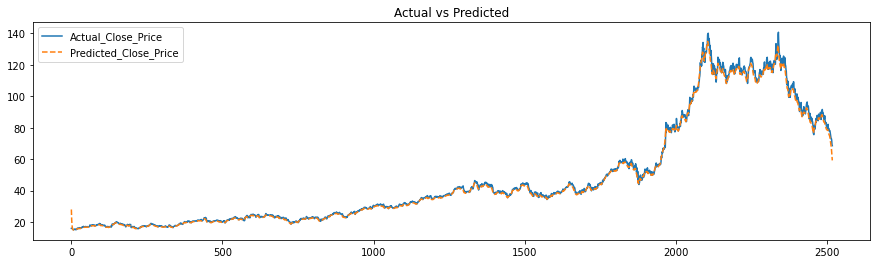

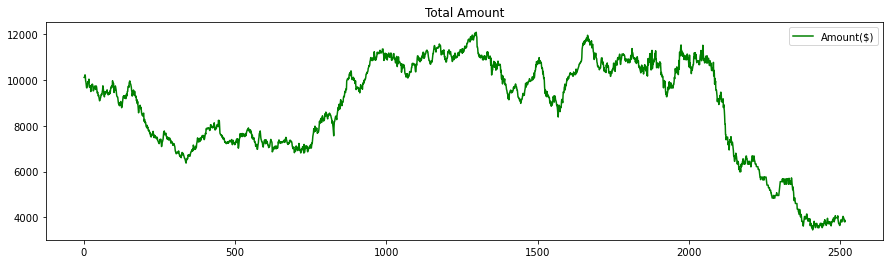

In [5]:
amount = 10000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)-1):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open & Sell at Close')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))
        
        
        # action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)
        Portfolio.append(round(portfolio,5))
        
    else:
        action.append('Sell at Open & Bull at Close')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))
        
        
        # action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
        Portfolio.append(round(portfolio,5))
    print('\n')
        

Strategy_Result = pd.DataFrame({'Actual_Close_Price':TSM.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': TSM.Date[1:],
                                 'Action':  action,
                                 # 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [6]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 3819.399932861328 $
Profit_Percent: 38.19399932861328 %


# 3.2 Buy & Hold Trading Strategy
 
* Position trading 
* Buy if we have next days predicted_value greater than todays close value and hold if already bought 
* Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [7]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i+1] > results['Actual'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / results['Actual'][i])
            balance = int(amount % results['Actual'][i])
            portfolio = stocks * results['Actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['Actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['Actual'][i]
            amount = portfolio + balance
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i+1] < results['Actual'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['Actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')
    

Stock: 15.899999618530273 Action: Buy Portfolio: 9985.2 Stocks: 628 Balance_init: 14 total($) 9999.2


Stock: 16.0 Action: Bought--Holding Portfolio: 10048.0 Stocks: 628 Balance_init: 14 total($) 10062.0


Stock: 16.049999237060547 Action: Bought--Holding Portfolio: 10079.4 Stocks: 628 Balance_init: 14 total($) 10093.4


Stock: 16.15999984741211 Action: Bought--Holding Portfolio: 10148.48 Stocks: 628 Balance_init: 14 total($) 10162.48


Stock: 16.06999969482422 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10105.96


Stock: 15.529999732971191 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10105.96


Stock: 15.359999656677246 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10105.96


Stock: 15.119999885559082 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10105.96


Stock: 15.029999732971191 Action: Buy Portfolio: 10100.16 Stocks: 672 Balance_init: 5 tota

Stock: 17.700000762939453 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23695.2


Stock: 17.68000030517578 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23695.2


Stock: 17.6200008392334 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23695.2


Stock: 17.459999084472656 Action: Buy Portfolio: 23693.22 Stocks: 1357 Balance_init: 1 total($) 23694.22


Stock: 17.260000228881836 Action: Bought--Holding Portfolio: 23421.82 Stocks: 1357 Balance_init: 1 total($) 23422.82


Stock: 17.670000076293945 Action: Bought--Holding Portfolio: 23978.19 Stocks: 1357 Balance_init: 1 total($) 23979.19


Stock: 18.09000015258789 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 24549.13


Stock: 18.010000228881836 Action: Buy Portfolio: 24547.63 Stocks: 1363 Balance_init: 1 total($) 24548.63


Stock: 18.149999618530273 Action: Bought--Holding Portfolio: 24738.45 Stocks: 1363 Ba

Stock: 20.139999389648438 Action: Bought--Holding Portfolio: 43945.48 Stocks: 2182 Balance_init: 18 total($) 43963.48


Stock: 20.06999969482422 Action: Bought--Holding Portfolio: 43792.74 Stocks: 2182 Balance_init: 18 total($) 43810.74


Stock: 20.719999313354492 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 45229.04


Stock: 20.719999313354492 Action: Buy Portfolio: 45211.04 Stocks: 2182 Balance_init: 18 total($) 45229.04


Stock: 20.8700008392334 Action: Bought--Holding Portfolio: 45538.34 Stocks: 2182 Balance_init: 18 total($) 45556.34


Stock: 21.389999389648438 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 46690.98


Stock: 21.239999771118164 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 46690.98


Stock: 21.299999237060547 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 46690.98


Stock: 21.18000030517578 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Bala

Stock: 22.309999465942383 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.219999313354492 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.510000228881836 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.469999313354492 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.15999984741211 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.200000762939453 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 22.079999923706055 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 104647.03


Stock: 21.81999969482422 Action: Buy Portfolio: 104626.9 Stocks: 4795 Balance_init: 20 total($) 104646.9


Stock: 21.959999084

Stock: 30.770000457763672 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 30.770000457763672 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 31.100000381469727 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 30.709999084472656 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 30.389999389648438 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 30.280000686645508 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 30.239999771118164 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 31.350000381469727 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 223763.0


Stock: 3

Stock: 41.209999084472656 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 369250.84


Stock: 41.31999969482422 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 369250.84


Stock: 41.15999984741211 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 369250.84


Stock: 41.20000076293945 Action: Buy Portfolio: 369234.41 Stocks: 8962 Balance_init: 16 total($) 369250.41


Stock: 42.150001525878906 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 377764.31


Stock: 42.130001068115234 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 377764.31


Stock: 42.33000183105469 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 377764.31


Stock: 42.099998474121094 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 377764.31


Stock: 42.150001525878906 Action: Price-Predi

Stock: 39.56999969482422 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 799391.84


Stock: 38.540000915527344 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 799391.84


Stock: 38.45000076293945 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 799391.84


Stock: 38.720001220703125 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 799391.84


Stock: 38.0 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 799391.84


Stock: 36.47999954223633 Action: Buy Portfolio: 799386.23 Stocks: 21913 Balance_init: 5 total($) 799391.23


Stock: 37.38999938964844 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 819332.06


Stock: 36.66999816894531 Action: Buy Portfolio: 819317.77 Stocks: 22343 Balance_init: 14 total($) 819331.77


Stock: 36.33000183105469 Action: Bought--Holding Portfolio: 811721.23 Stoc

Stock: 46.47999954223633 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 2091456.06


Stock: 47.189998626708984 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 2091456.06


Stock: 46.43000030517578 Action: Buy Portfolio: 2091439.36 Stocks: 45045 Balance_init: 16 total($) 2091455.36


Stock: 47.130001068115234 Action: Bought--Holding Portfolio: 2122970.9 Stocks: 45045 Balance_init: 16 total($) 2122986.9


Stock: 47.41999816894531 Action: Bought--Holding Portfolio: 2136033.82 Stocks: 45045 Balance_init: 16 total($) 2136049.82


Stock: 47.95000076293945 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 2159923.78


Stock: 47.86000061035156 Action: Buy Portfolio: 2159921.83 Stocks: 45130 Balance_init: 1 total($) 2159922.83


Stock: 48.68000030517578 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 2196929.41


Stock: 48.93000030517578 Action: Buy Portfolio: 2196908.08 Stocks: 44899 Balance_init: 21 total($) 2196929.

Stock: 99.54000091552734 Action: Buy Portfolio: 16529612.55 Stocks: 166060 Balance_init: 24 total($) 16529636.55


Stock: 99.5 Action: Bought--Holding Portfolio: 16522970.0 Stocks: 166060 Balance_init: 24 total($) 16522994.0


Stock: 103.7300033569336 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 106.38999938964844 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 105.63999938964844 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 104.41999816894531 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 104.2300033569336 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 104.02999877929688 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 17225428.36


Stock: 103.55999755859375 Action: Price

Stock: 120.30999755859375 Action: Bought--Holding Portfolio: 63100187.52 Stocks: 524480 Balance_init: 71 total($) 63100258.52


Stock: 128.8000030517578 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 67553096.6


Stock: 133.39999389648438 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 67553096.6


Stock: 127.05999755859375 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 67553096.6


Stock: 128.47000122070312 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 67553096.6


Stock: 123.5 Action: Buy Portfolio: 67553018.0 Stocks: 546988 Balance_init: 78 total($) 67553096.0


Stock: 125.01000213623047 Action: Bought--Holding Portfolio: 68378971.05 Stocks: 546988 Balance_init: 78 total($) 68379049.05


Stock: 129.1699981689453 Action: Bought--Holding Portfolio: 70654438.96 Stocks: 546988 Balance_init: 78 total($) 70654516.96


Stock: 132.22999572753906 Action: Bough

In [8]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':TSM.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': TSM.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.tail()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
2512,73.010002,68.485969,2022-09-26,Price-Prediction-Already-Lower,0,0.0,140508963.0
2513,73.029999,66.999328,2022-09-27,Price-Prediction-Already-Lower,0,0.0,140508963.0
2514,72.129997,64.809404,2022-09-28,Price-Prediction-Already-Lower,0,0.0,140508963.0
2515,69.279999,62.009500,2022-09-29,Price-Prediction-Already-Lower,0,0.0,140508963.0
2516,68.559998,59.208563,2022-09-30,Price-Prediction-Already-Lower,0,0.0,140508963.0


<AxesSubplot:title={'center':'Total Amount'}>

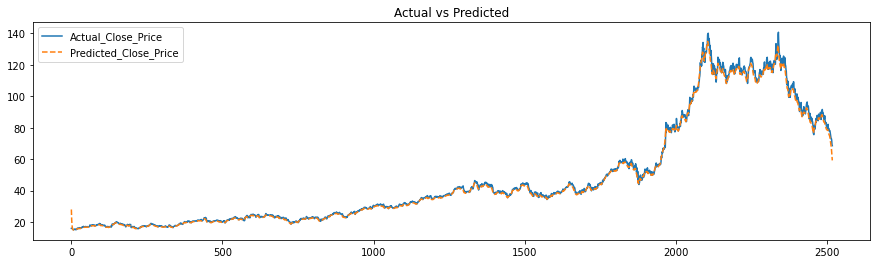

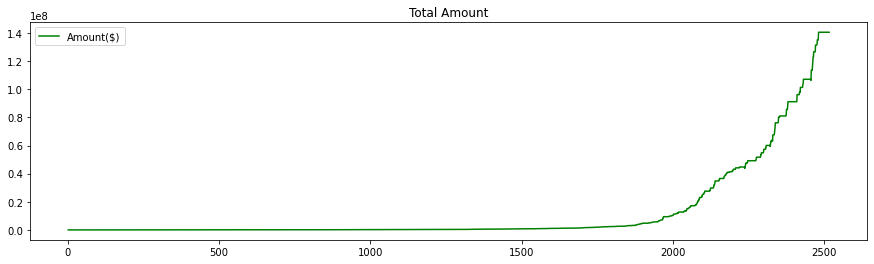

In [9]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [10]:
# Profit = (Amount[-1] - Amount[0])/Amount[0]
# print('Initial_Investment : ',Amount[0])
# print('Final Amount:',Amount[-1],'$')      
# print ('Profit_Percent at the end of 10th year:',round(Profit*100,2),'%')

In [11]:
Profit = (Amount[-1] - Amount[-251])/Amount[-251]
print('Initial_Investment : ',Amount[-251])
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent latest trading year:',round(Profit*100,2),'%')

Initial_Investment :  49185970.0
Final Amount: 140508963.0 $
Profit_Percent latest trading year: 185.67 %


 Model evaluaion

* R2 score

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


R2_score  = r2_score(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price'], multioutput='variance_weighted')

print("R2 Score : ",R2_score)

R2 Score :  0.9978352645121594


# Buy & Hold Trading Strategy with bollinger bands

In [15]:
long_MA = results['Actual'].rolling(window=20).mean()
results['Long_Moving_Avg'] = long_MA

In [16]:
short_MA  = results['Actual'].rolling(window=5).mean()
results['Short_Moving_Avg'] = short_MA 

In [17]:
long_std= results['Actual'].rolling(window=20).std()
results['Long_std'] = long_std

In [18]:
long_upper_band = ((long_MA) + (long_std)*0.75)
results['Long_Upper_Band'] = long_upper_band

In [19]:
long_lower_band = ((long_MA) - (long_std)*0.75)
results['Long_Lower_Band'] = long_lower_band

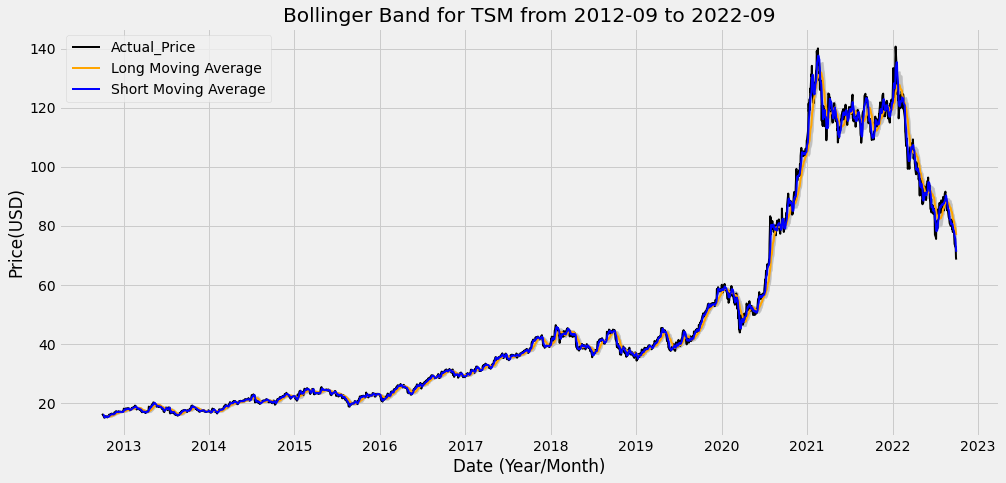

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = results.index
ax.fill_between(x_axis, results['Long_Upper_Band'], results['Long_Lower_Band'], color='silver')
ax.plot(x_axis, results['Actual'], color='black', lw=2, label = 'Actual_Price')
ax.plot(x_axis, results['Long_Moving_Avg'], color='orange', lw=2, label = 'Long Moving Average')
ax.plot(x_axis, results['Short_Moving_Avg'], color='blue', lw=2, label = 'Short Moving Average')

ax.set_title('Bollinger Band for TSM from 2012-09 to 2022-09')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

In [23]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(results)-1):
    if results['Predicted'][i] > results['Long_Lower_Band'][i]:
        if signal == 0:
            
            action.append('Buy')
            stocks = int(amount / results['Actual'][i])
            balance = int(amount % results['Actual'][i])
            portfolio = stocks * results['Actual'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',results['Actual'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * results['Actual'][i]
            amount = portfolio + balance
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif results['Predicted'][i] < results['Long_Moving_Avg'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * results['Actual'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
    else:
        action.append('Do nothing')
        print('Stock:',results['Actual'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
        Portfolio.append(round(portfolio,5))
        Amount.append(round(amount,0))
        Stocks.append(stocks)

            
    print('\n')
    

Strategy_Result = pd.DataFrame({'Actual_Close_Price':TSM.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': TSM.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

Stock: 15.899999618530273 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 16.0 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 16.049999237060547 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 16.15999984741211 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 16.06999969482422 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 15.529999732971191 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 15.359999656677246 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 15.119999885559082 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 15.029999732971191 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock: 15.119999885559082 Action: Do nothing Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 10000


Stock:

Stock: 18.979999542236328 Action: Bought--Holding Portfolio: 16170.96 Stocks: 852 Balance_init: 6 total($) 16176.96


Stock: 19.15999984741211 Action: Bought--Holding Portfolio: 16324.32 Stocks: 852 Balance_init: 6 total($) 16330.32


Stock: 18.719999313354492 Action: Bought--Holding Portfolio: 15949.44 Stocks: 852 Balance_init: 6 total($) 15955.44


Stock: 18.68000030517578 Action: Bought--Holding Portfolio: 15915.36 Stocks: 852 Balance_init: 6 total($) 15921.36


Stock: 18.469999313354492 Action: Bought--Holding Portfolio: 15736.44 Stocks: 852 Balance_init: 6 total($) 15742.44


Stock: 18.610000610351562 Action: Bought--Holding Portfolio: 15855.72 Stocks: 852 Balance_init: 6 total($) 15861.72


Stock: 18.770000457763672 Action: Bought--Holding Portfolio: 15992.04 Stocks: 852 Balance_init: 6 total($) 15998.04


Stock: 18.579999923706055 Action: Bought--Holding Portfolio: 15830.16 Stocks: 852 Balance_init: 6 total($) 15836.16


Stock: 18.40999984741211 Action: Bought--Holding Portfolio

Stock: 20.360000610351562 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.34000015258789 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.59000015258789 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.110000610351562 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.139999389648438 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 19.950000762939453 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.18000030517578 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.100000381469727 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 23148.95


Stock: 20.2

Stock: 22.079999923706055 Action: Bought--Holding Portfolio: 36211.2 Stocks: 1640 Balance_init: 19 total($) 36230.2


Stock: 21.81999969482422 Action: Bought--Holding Portfolio: 35784.8 Stocks: 1640 Balance_init: 19 total($) 35803.8


Stock: 21.959999084472656 Action: Bought--Holding Portfolio: 36014.4 Stocks: 1640 Balance_init: 19 total($) 36033.4


Stock: 22.100000381469727 Action: Bought--Holding Portfolio: 36244.0 Stocks: 1640 Balance_init: 19 total($) 36263.0


Stock: 22.770000457763672 Action: Bought--Holding Portfolio: 37342.8 Stocks: 1640 Balance_init: 19 total($) 37361.8


Stock: 23.549999237060547 Action: Bought--Holding Portfolio: 38622.0 Stocks: 1640 Balance_init: 19 total($) 38641.0


Stock: 22.979999542236328 Action: Bought--Holding Portfolio: 37687.2 Stocks: 1640 Balance_init: 19 total($) 37706.2


Stock: 22.81999969482422 Action: Bought--Holding Portfolio: 37424.8 Stocks: 1640 Balance_init: 19 total($) 37443.8


Stock: 22.959999084472656 Action: Bought--Holding Portfoli

Stock: 29.65999984741211 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 29.65999984741211 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 29.549999237060547 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 29.690000534057617 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 28.549999237060547 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 28.860000610351562 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 29.020000457763672 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 63910.75


Stock: 29.510000228881836 Action: Buy Portfolio: 63889.15 Stocks: 2165 Balance_init: 21 total($) 63910.15


Stock: 29.93000030517578 A

Stock: 41.029998779296875 Action: Bought--Holding Portfolio: 99990.11 Stocks: 2437 Balance_init: 18 total($) 100008.11


Stock: 41.189998626708984 Action: Bought--Holding Portfolio: 100380.03 Stocks: 2437 Balance_init: 18 total($) 100398.03


Stock: 42.22999954223633 Action: Bought--Holding Portfolio: 102914.51 Stocks: 2437 Balance_init: 18 total($) 102932.51


Stock: 43.130001068115234 Action: Bought--Holding Portfolio: 105107.81 Stocks: 2437 Balance_init: 18 total($) 105125.81


Stock: 44.56999969482422 Action: Bought--Holding Portfolio: 108617.09 Stocks: 2437 Balance_init: 18 total($) 108635.09


Stock: 44.66999816894531 Action: Bought--Holding Portfolio: 108860.79 Stocks: 2437 Balance_init: 18 total($) 108878.79


Stock: 46.380001068115234 Action: Bought--Holding Portfolio: 113028.06 Stocks: 2437 Balance_init: 18 total($) 113046.06


Stock: 46.279998779296875 Action: Bought--Holding Portfolio: 112784.36 Stocks: 2437 Balance_init: 18 total($) 112802.36


Stock: 45.33000183105469 Act

Stock: 38.290000915527344 Action: Bought--Holding Portfolio: 152968.55 Stocks: 3995 Balance_init: 4 total($) 152972.55


Stock: 38.63999938964844 Action: Bought--Holding Portfolio: 154366.8 Stocks: 3995 Balance_init: 4 total($) 154370.8


Stock: 38.130001068115234 Action: Bought--Holding Portfolio: 152329.35 Stocks: 3995 Balance_init: 4 total($) 152333.35


Stock: 38.060001373291016 Action: Bought--Holding Portfolio: 152049.71 Stocks: 3995 Balance_init: 4 total($) 152053.71


Stock: 38.09000015258789 Action: Bought--Holding Portfolio: 152169.55 Stocks: 3995 Balance_init: 4 total($) 152173.55


Stock: 38.459999084472656 Action: Bought--Holding Portfolio: 153647.7 Stocks: 3995 Balance_init: 4 total($) 153651.7


Stock: 39.0 Action: Bought--Holding Portfolio: 155805.0 Stocks: 3995 Balance_init: 4 total($) 155809.0


Stock: 38.97999954223633 Action: Bought--Holding Portfolio: 155725.1 Stocks: 3995 Balance_init: 4 total($) 155729.1


Stock: 39.38999938964844 Action: Bought--Holding Portfoli

Stock: 49.869998931884766 Action: Bought--Holding Portfolio: 306700.49 Stocks: 6150 Balance_init: 1 total($) 306701.49


Stock: 46.90999984741211 Action: Sell Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 288497.5


Stock: 47.81999969482422 Action: Buy Portfolio: 288450.24 Stocks: 6032 Balance_init: 47 total($) 288497.24


Stock: 47.790000915527344 Action: Bought--Holding Portfolio: 288269.29 Stocks: 6032 Balance_init: 47 total($) 288316.29


Stock: 46.5099983215332 Action: Bought--Holding Portfolio: 280548.31 Stocks: 6032 Balance_init: 47 total($) 280595.31


Stock: 48.130001068115234 Action: Bought--Holding Portfolio: 290320.17 Stocks: 6032 Balance_init: 47 total($) 290367.17


Stock: 47.060001373291016 Action: Bought--Holding Portfolio: 283865.93 Stocks: 6032 Balance_init: 47 total($) 283912.93


Stock: 49.970001220703125 Action: Bought--Holding Portfolio: 301419.05 Stocks: 6032 Balance_init: 47 total($) 301466.05


Stock: 49.720001220703125 Action: Bought--Holding Portfolio: 2999

Stock: 108.20999908447266 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 108.75 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 112.45999908447266 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 109.80000305175781 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 110.83999633789062 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 112.4000015258789 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 113.27999877929688 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 857555.15


Stock: 111.8499984741211 Action: Buy Portfolio: 857553.94 Stocks: 7667 Balance_init: 1 total($) 857554.94


Stock: 113.62999725341797 Acti

Stock: 87.83000183105469 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 87.69000244140625 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 90.95999908447266 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 90.41000366210938 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 93.31999969482422 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 90.52999877929688 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 90.20999908447266 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54


Stock: 90.77999877929688 Action: Price-Prediction-Already-Lower Portfolio: 0 Stocks: 0 Balance_init: 0 total($) 1232763.54




,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,16.000000,28.000774,2012-10-02,Do nothing,0,0.0,10000.0
2,16.049999,21.759663,2012-10-03,Do nothing,0,0.0,10000.0
3,16.160000,18.454053,2012-10-04,Do nothing,0,0.0,10000.0
4,16.070000,16.686021,2012-10-05,Do nothing,0,0.0,10000.0
5,15.530000,15.705517,2012-10-08,Do nothing,0,0.0,10000.0


<AxesSubplot:title={'center':'Total Amount'}>

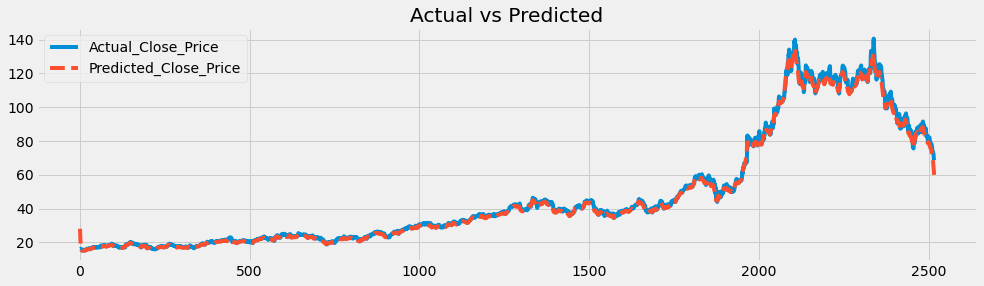

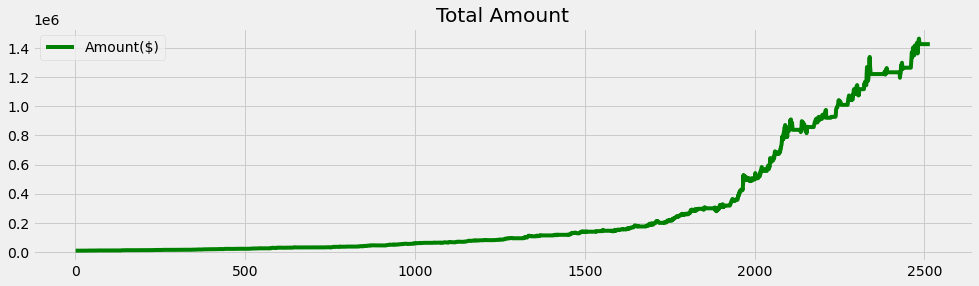

In [24]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [27]:
# Profit = (Amount[-1])/10000
# print('Initial_Investment : 10000$')
# print('Final Amount:',Amount[-1],'$')      
# print ('Profit_Percent:',Profit*100,'%')

In [26]:
Profit = (Amount[-1] - Amount[-251])/Amount[-251]
print('Initial_Investment : ',Amount[-251])
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent latest trading year:',round(Profit*100,2),'%')

Initial_Investment :  1009590.0
Final Amount: 1425716.0 $
Profit_Percent latest trading year: 41.22 %
